In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits= datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 666)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
sk_knn_clf = KNeighborsClassifier(n_neighbors = 4,weights = "uniform")
sk_knn_clf.fit(X_train, y_train)
sk_knn_clf.score(X_test, y_test)

0.9916666666666667

### Grid Search 网格搜索

In [6]:
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1,11)],
        'p': [i for i in range(1, 6)]
    }
]

In [7]:
knn_clf = KNeighborsClassifier()

In [9]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid)

In [10]:
%%time
grid_search.fit(X_train, y_train)

Wall time: 3min 15s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
grid_search.score(X_test,y_test)

0.9833333333333333

In [12]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance')

In [13]:
grid_search.best_score_

0.9853862212943633

In [14]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [15]:
knn_clf = grid_search.best_estimator_

#### n_jobs 参数表示用到处理器的个数，-1表示使用所有的处理器， verbose 越大，显示的信息越多

In [17]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs = -1,verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min


Wall time: 1min 20s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.3min finished


## 数据归一化
### 均值方差归一化

In [18]:
import matplotlib.pyplot as plt

#### 最值归一化 Normalization

#### X = (x-min(x))/(max(x)-min(x))

In [20]:
x = np.random.randint(1, 100, 100)
x

array([11,  3, 77, 91, 80, 34, 28, 78, 63, 18, 67, 95, 63, 30, 99, 59, 94,
       78, 40, 15, 44, 69, 39, 68, 79, 53, 68, 42, 53, 65, 83, 30, 67, 78,
       10, 27,  4, 46, 94,  5, 70, 79, 77, 82, 26, 84,  4, 16, 24, 94, 89,
       57, 28, 47, 72, 48, 93, 84, 32, 32, 41, 71, 60,  6, 74, 69, 46, 35,
       22, 19,  2, 90, 11, 34, 80, 75, 39, 69, 19, 55, 21,  1, 19, 73, 78,
       78, 51, 25, 34, 16, 12, 18, 53, 95, 28, 20, 49, 76, 76, 58])

In [21]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.10204082, 0.02040816, 0.7755102 , 0.91836735, 0.80612245,
       0.33673469, 0.2755102 , 0.78571429, 0.63265306, 0.17346939,
       0.67346939, 0.95918367, 0.63265306, 0.29591837, 1.        ,
       0.59183673, 0.94897959, 0.78571429, 0.39795918, 0.14285714,
       0.43877551, 0.69387755, 0.3877551 , 0.68367347, 0.79591837,
       0.53061224, 0.68367347, 0.41836735, 0.53061224, 0.65306122,
       0.83673469, 0.29591837, 0.67346939, 0.78571429, 0.09183673,
       0.26530612, 0.03061224, 0.45918367, 0.94897959, 0.04081633,
       0.70408163, 0.79591837, 0.7755102 , 0.82653061, 0.25510204,
       0.84693878, 0.03061224, 0.15306122, 0.23469388, 0.94897959,
       0.89795918, 0.57142857, 0.2755102 , 0.46938776, 0.7244898 ,
       0.47959184, 0.93877551, 0.84693878, 0.31632653, 0.31632653,
       0.40816327, 0.71428571, 0.60204082, 0.05102041, 0.74489796,
       0.69387755, 0.45918367, 0.34693878, 0.21428571, 0.18367347,
       0.01020408, 0.90816327, 0.10204082, 0.33673469, 0.80612

In [23]:
X = np.random.randint(0,100,(50,2))

In [25]:
X = np.array(X, dtype = float)
X[:10,:]

array([[38., 44.],
       [87.,  0.],
       [82.,  7.],
       [63.,  3.],
       [87., 10.],
       [ 8., 95.],
       [13.,  2.],
       [30., 26.],
       [27., 76.],
       [15.,  9.]])

In [26]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0])-np.min(X[:,0]))

In [27]:
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1])-np.min(X[:,1]))

In [28]:
X[:10,:]

array([[0.40659341, 0.46315789],
       [0.94505495, 0.        ],
       [0.89010989, 0.07368421],
       [0.68131868, 0.03157895],
       [0.94505495, 0.10526316],
       [0.07692308, 1.        ],
       [0.13186813, 0.02105263],
       [0.31868132, 0.27368421],
       [0.28571429, 0.8       ],
       [0.15384615, 0.09473684]])

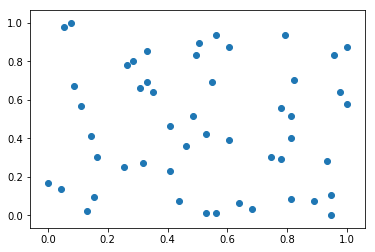

In [29]:
plt.scatter(X[:,0],X[:,1])

In [30]:
np.mean(X[:,0])#均值

0.5173626373626373

In [31]:
np.std(X[:,0])#方差

0.29776643068128317

## 均值方差归一化：把所有的数据归一到均值为0方差为1的分布中

### 数据分布没有明显的边界；youkenengcunzai极端数据值

#### X=（x-mean(x）/  std(x)

In [65]:
X2 = np.random.randint(0, 100,(50,2))

In [71]:
X2 = np.array(X2, dtype = float)

In [67]:
X2[:,0] = (X2[:,0] - np.mean(X2[:, 0])) / np.std(X2[:, 0])

In [68]:
X2[:,1] = (X2[:,1] - np.mean(X2[:, 1])) / np.std(X2[:, 1])

In [69]:
X2[:10,:]

array([[ 0.0756629 , -0.72427097],
       [ 1.47138633,  1.67001322],
       [-1.13641271,  0.88438872],
       [ 1.21427938, -0.31275337],
       [-0.14471448, -0.9861458 ],
       [-1.17314227, -0.49980682],
       [-1.32006053,  0.51028182],
       [-1.54043791, -0.35016406],
       [-0.14471448,  0.09876422],
       [ 0.36949941, -0.5746282 ]])

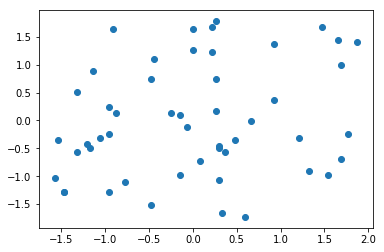

In [70]:
plt.scatter(X2[:,0], X2[:,1])

In [72]:
np.mean(X2[:,0])

7.66053886991358e-17

In [73]:
np.std(X2[:,0])

1.0